### Share of 25-54 year olds making less than $15/hour, by industry group

Updated February 4, 2019

Brian Dew, @bd_econ

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os

os.chdir('/home/brian/Documents/CPS/data/clean/')

In [2]:
df2000 = pd.read_feather('cps2000.ft')
df2018 = pd.read_feather('cps2018.ft')

In [3]:
d = {}
for year, dfyear in [('2000', df2000), ('2018', df2018)]:
    df = dfyear
    grp = df[(df['PWORWGT'] > 0) & 
             (df['AGE'].between(25, 54)) & 
             (df['RHRWAGE'] > 0)]
    ed_lt15 = grp[(grp['RHRWAGE'] < 15) & 
                  (grp['EDUC'].isin(['SC', 'COLL', 'ADV']))]
    data_tot = (ed_lt15['PWORWGT'].sum() / grp['PWORWGT'].sum())
    dt = pd.Series({'INDGRP': '$\\bf{Total, \ all \ industries}$', 'PWORWGT': data_tot})
    data_ind = (ed_lt15.groupby(['INDGRP'])['PWORWGT'].sum() / 
                grp.groupby(['INDGRP'])['PWORWGT'].sum())
    d[year] = (data_ind.reset_index().append(dt, ignore_index=True)
                   .set_index('INDGRP').drop('Armed forces'))['PWORWGT']

data = pd.DataFrame(d).multiply(100).sort_values('2018').round(1)

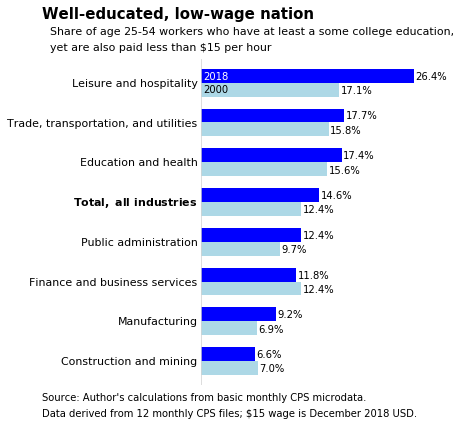

In [4]:
# horizontal bar plot
data.plot(kind='barh', figsize=(4,6), color=['lightblue', 'blue'], width=0.7, 
          legend=None)

# add value labels to ends of bars and country names to start of bars
for col in data.keys():
    for i, val in enumerate(data[col]):
        if col == '2000':
            y = i-0.18
            plt.text(-0.5, i-0.1, data.index[i], ha='right', fontsize=11)
        else:
            y = i+0.18
        plt.text(val+0.2, y-0.1, f'{val:.1f}%')
        
plt.axvline(x=0, color='lightgray')
plt.text(0.2, 6.75, '2000')
plt.text(0.2, 7.08, '2018', color='white')
# Text location
text_loc = (-data.max().max() * 0.75)

# add title and footer
plt.text(text_loc, 8.6, 'Well-educated, low-wage nation', 
          fontsize=15, weight='bold')
plt.text(text_loc+1, 8.2, "Share of age 25-54 workers who have at least a some college education,", 
          fontsize=11)
plt.text(text_loc+1, 7.8, 'yet are also paid less than $15 per hour', 
          fontsize=11)
plt.text(text_loc, -1, "Source: Author's calculations from basic monthly CPS microdata.")
plt.text(text_loc, -1.4, "Data derived from 12 monthly CPS files; $15 wage is December 2018 USD.")

plt.axis('off')

plt.savefig('WellEducatedLowWage3.png', bbox_inches='tight')
plt.show()